In [48]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.circuit.library import PhaseGate
from qiskit.circuit.library import  QFT
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

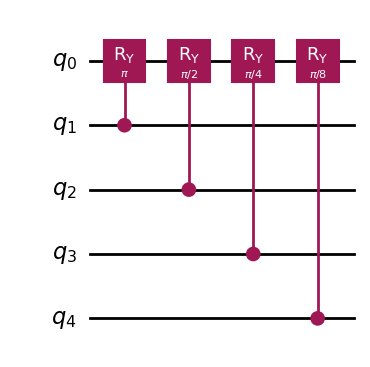

In [49]:
def controlled_rotation_hhl(num_eigen_qubits):
    """
    Builds the controlled Ry rotation cascade for the HHL algorithm.
    Qubit 0 is the ancilla, and qubits 1 to d are the eigenvalue register.
    """
    total_qubits = 1 + num_eigen_qubits  # 1 ancilla + d eigenvalue qubits
    qc = QuantumCircuit(total_qubits, name="ControlledRotation")

    ancilla = 0
    for i in range(num_eigen_qubits):
        control = i + 1  # q[1] to q[d]
        angle = np.pi / (2 ** i)
        ry_gate = RYGate(angle).control()
        qc.append(ry_gate, [control, ancilla])

    return qc

# Create the circuit for 4 eigenvalue qubits (q1–q4), ancilla is q0
qc = controlled_rotation_hhl(4)
qc.draw('mpl')


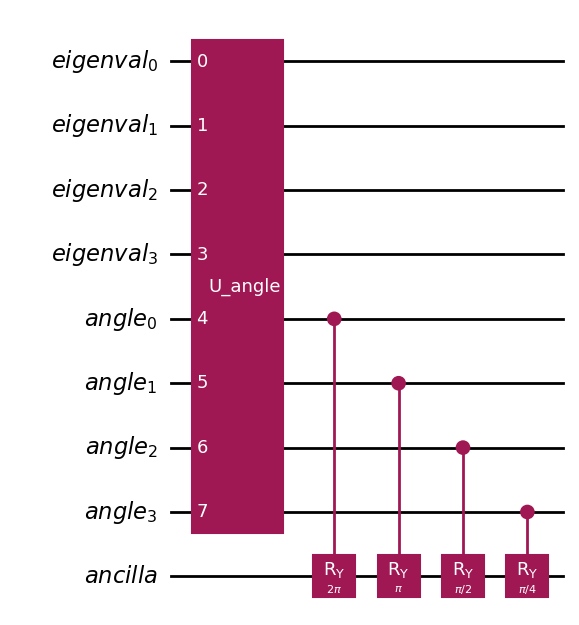

In [50]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import RYGate
from numpy import pi

# Number of eigenvalue qubits
d = 4

# Registers
eigenval = QuantumRegister(d, 'eigenval')      # holds |λ_j⟩
angle = QuantumRegister(d, 'angle')            # intermediate angle computation (set to d for demo)
ancilla = QuantumRegister(1, 'ancilla')        # target qubit

qc = QuantumCircuit(eigenval, angle, ancilla)

# Step 1: U_angle (classical arithmetic: λ_j --> θ_j = C / λ_j)
# For demonstration, we'll use a placeholder for U_angle_gate
# In a real HHL, this would be a custom gate that computes θ_j from λ_j
from qiskit.circuit import Gate
U_angle_gate = Gate("U_angle", 2*d, [])

qc.append(U_angle_gate, eigenval[:] + angle[:])

# Step 2: Apply RY(2πθ_j) controlled by angle qubits
for i in range(len(angle)):
    angle_bit = angle[i]
    theta = pi / (2 ** i)  # assume θ_j encoded in binary fractional bits
    ry = RYGate(2 * theta).control()
    qc.append(ry, [angle_bit, ancilla[0]])

# Step 3: U_angle† (uncompute)
# Skipped because inverse() is not implemented for placeholder gates.
# In a real implementation, use a gate with a definition to allow inversion.
# qc.append(U_angle_gate.inverse(), eigenval[:] + angle[:])

qc.draw('mpl')

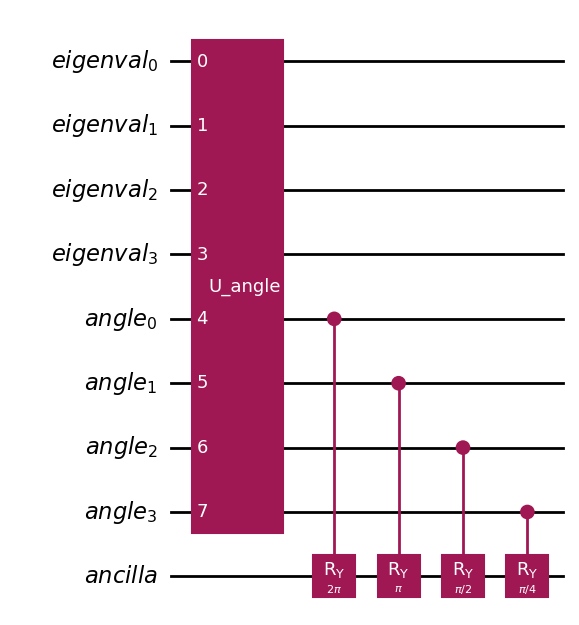

In [51]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import RYGate
from numpy import pi

def construct_u_angle(d):
    """
    Constructs a simple demonstration U_angle gate.
    For real HHL, this should compute θ_j = C / λ_j.
    Here, it just applies X gates to 'angle' qubits controlled by 'eigenval' qubits.
    """
    qc = QuantumCircuit(2*d, name="U_angle")
    for i in range(d):
        qc.cx(i, d+i)  # Control: eigenval[i], Target: angle[i]
    return qc.to_gate()

def controlled_rotation_hhl(d):
    """
    Builds the controlled Ry rotation cascade for the HHL algorithm.
    Uses explicit QuantumRegisters for eigenval, angle, and ancilla.
    """
    eigenval = QuantumRegister(d, 'eigenval')      # holds |λ_j⟩
    angle = QuantumRegister(d, 'angle')            # intermediate angle computation
    ancilla = QuantumRegister(1, 'ancilla')        # target qubit

    qc = QuantumCircuit(eigenval, angle, ancilla)

    # Step 1: U_angle (simple demonstration version)
    U_angle_gate = construct_u_angle(d)
    qc.append(U_angle_gate, eigenval[:] + angle[:])

    # Step 2: Apply RY(2πθ_j) controlled by angle qubits
    for i in range(d):
        angle_bit = angle[i]
        theta = pi / (2 ** i)  # assume θ_j encoded in binary fractional bits
        ry = RYGate(2 * theta).control()
        qc.append(ry, [angle_bit, ancilla[0]])

    # Step 3: U_angle† (uncompute, skipped for demonstration)
    # If U_angle_gate had a definition, you could use:
    # qc.append(U_angle_gate.inverse(), eigenval[:] + angle[:])

    return qc

# Create the circuit for 4 eigenvalue qubits
d = 4
qc = controlled_rotation_hhl(d)
qc.draw('mpl')

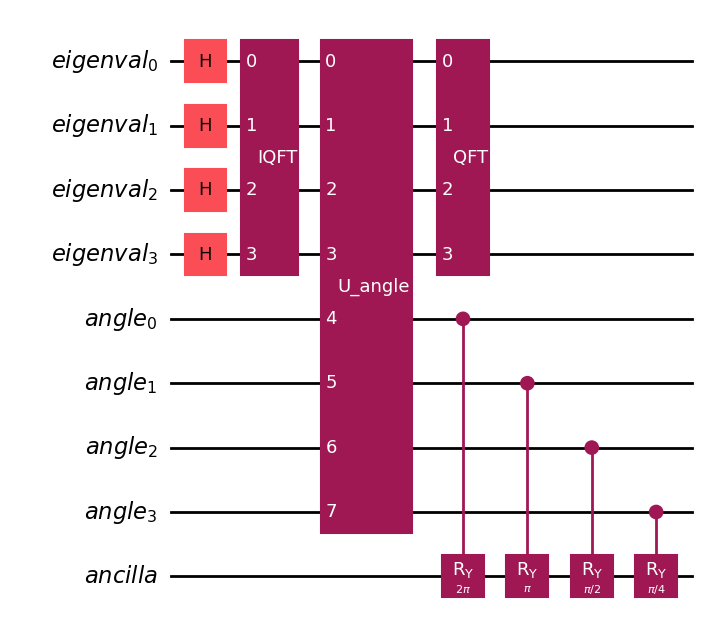

In [52]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import QFT, RYGate
from numpy import pi

def construct_u_angle(d):
    """
    Constructs a demonstration U_angle gate for HHL.
    In a real HHL, this would compute θ_j = C / λ_j using quantum arithmetic.
    Here, each eigenval[i] controls an X gate on angle[i], 
    so the angle register mirrors the eigenvalue register.
    """
    qc = QuantumCircuit(2*d, name="U_angle")
    for i in range(d):
        qc.cx(i, d+i)  # Control: eigenval[i], Target: angle[i]
    return qc.to_gate()

def qpe_block(unitary, d, eigenval):
    """
    QPE block: applies Hadamards, controlled-unitaries, and inverse QFT.
    For demonstration, uses QFT as a placeholder for inverse QFT.
    """
    qc = QuantumCircuit(eigenval)
    qc.h(eigenval)
    # Placeholder for controlled-unitary operations
    # In real HHL, apply controlled-U^2^j gates here
    # For demonstration, skip or use identity
    qc.append(QFT(d, inverse=True), eigenval[:])
    return qc

def controlled_rotation_hhl(d, eigenval, angle, ancilla):
    """
    Controlled rotation block for HHL.
    """
    qc = QuantumCircuit(eigenval, angle, ancilla)
    U_angle_gate = construct_u_angle(d)
    qc.append(U_angle_gate, eigenval[:] + angle[:])
    for i in range(d):
        angle_bit = angle[i]
        theta = pi / (2 ** i)
        ry = RYGate(2 * theta).control()
        qc.append(ry, [angle_bit, ancilla[0]])
    # Uncompute U_angle (skipped for demonstration)
    return qc

# Number of eigenvalue qubits
d = 4

# Registers
eigenval = QuantumRegister(d, 'eigenval')
angle = QuantumRegister(d, 'angle')
ancilla = QuantumRegister(1, 'ancilla')

# Main circuit
qc = QuantumCircuit(eigenval, angle, ancilla)

# Step 1: QPE
qc.compose(qpe_block(None, d, eigenval), eigenval[:], inplace=True)

# Step 2: Controlled Rotation
qc.compose(controlled_rotation_hhl(d, eigenval, angle, ancilla), eigenval[:] + angle[:] + ancilla[:], inplace=True)

# Step 3: QPE Inverse (uncompute)
qc.append(QFT(d), eigenval[:])  # QFT as placeholder for QPE inverse

qc.draw('mpl')